# Ensemble Learning

In [5]:
# The Ensemble methods in machine learning combine the insights obtained from
# multiple learning models to facilitate accurate and improved decisions.

# There are two main types of ensemble learning:
# 1) Bagging(Bootstrap Aggregating)
# 2) Boosting

In [6]:
# Basic Ensemble Techniques:
# - Max voting
# - Averaging
# - Weighted Average

# Advanced Ensemble Techniques
# - Stacking
# - Blending
# - Bagging
# - Boosting

# Algorithms based on Bagging and Boosting
# 1) Bagging algorithms:
#  - Bagging meta-estimator
#  - Random Forest
# 2) Boosting algorithms:
#  - AdaBoost
#  - GBM
#  - XGBM
#  - Light GBM
#  - CatBoost

# MAX Voting

In [8]:
# The max voting method is generally used for classification problems.
# In this technique, multiple models are used to make predictions for each data points.
# The predictions by each model are considered as a 'vote'. The predictions which we get
# from the majority of the models are used as the final prediction.

# Averaging & Weighted Average Voting

In [10]:
# Take an average of predictions from all the models and use it to make the 
# final prediction.
# Averaging can be used for making predictions in regression problems or while calculating
# probabilities for classification problems.

# Max Voting, Averaging & Weighted Average Voting (Regression Practical)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.datasets import make_moons

In [14]:
x,y= make_moons(n_samples=1000,noise=0.2)

In [15]:
x

array([[ 0.46688242,  0.85481298],
       [ 0.04877567,  1.30809587],
       [ 0.21853679,  0.17209375],
       ...,
       [ 0.45848776,  0.84865839],
       [-0.2273017 ,  0.03779923],
       [-0.22634395,  0.9554504 ]], shape=(1000, 2))

In [16]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,

In [17]:
df={'x1':x[:,0],'x2':x[:,1],'y':y}

In [18]:
dataset=pd.DataFrame(df)

In [19]:
dataset.head(3)

,x1,x2,y
0,0.466882,0.854813,0
1,0.048776,1.308096,0
2,0.218537,0.172094,1


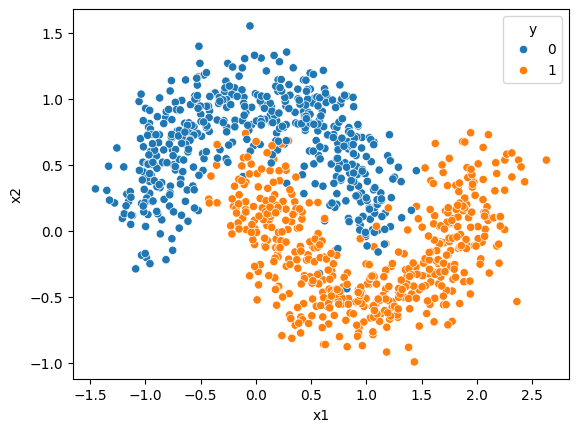

In [20]:
sns.scatterplot(x='x1',y='x2',data=dataset,hue='y')
plt.show()

In [21]:
x_a = dataset.iloc[:,:-1]

In [22]:
x_a

,x1,x2
0,0.466882,0.854813
1,0.048776,1.308096
2,0.218537,0.172094
3,1.632259,-0.316348
4,1.673277,-0.085624
...,...,...
995,0.681209,-0.171846
996,-0.104975,0.874822
997,0.458488,0.848658
998,-0.227302,0.037799


In [23]:
y_a = dataset['y']

In [24]:
y_a

0      0
1      0
2      1
3      1
4      1
      ..
995    1
996    0
997    0
998    1
999    0
Name: y, Length: 1000, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [28]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, 95.5)

In [29]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(96.875, 96.5)

In [30]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100,gnb.score(x_test,y_test)*100

(86.0, 89.0)

In [31]:
from sklearn.ensemble import VotingClassifier

In [32]:
li=[('dt1',DecisionTreeClassifier()),('sv1', SVC()),('gnb1',GaussianNB())]

In [33]:
vc= VotingClassifier(li)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [34]:
vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100

(97.625, 95.5)

In [35]:
prd={'dt':dt.predict(x_test),'svm':sv.predict(x_test),'gnb':gnb.predict(x_test),'vc':vc.predict(x_test)}

In [36]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,1,1,0,1
4,0,0,0,0
...,...,...,...,...
195,0,0,0,0
196,1,1,1,1
197,0,0,0,0
198,0,0,0,0


# Max Voting, Averaging & Weighted Average Voting ( Classification Practical)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
dataset= pd.read_csv('placement.csv')

In [40]:
dataset.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


In [41]:
x=dataset.iloc[:,:-1]
y=dataset['package']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [45]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100

(77.58339025733345, 77.30984312051673)

In [46]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(95.1559200955432, 52.19733481708333)

In [47]:
sv=SVR()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100

(78.16909319813372, 75.94945442913415)

In [48]:
from sklearn.ensemble import VotingRegressor

In [49]:
li=[('lr1',LinearRegression()),('dt1',DecisionTreeRegressor()),('sv1',SVR())]

In [50]:
vc=VotingRegressor(li)
vc.fit(x_train,y_train)

VotingRegressor(estimators=[('lr1', LinearRegression()),
                            ('dt1', DecisionTreeRegressor()), ('sv1', SVR())])

In [51]:
vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100

(87.56852979319457, 75.16568331690885)

In [52]:
df={'lr':lr.predict(x_test),'dt':dt.predict(x_test),'svm':sv.predict(x_test),'vc':vc.predict(x_test)}

In [106]:
pd.DataFrame(df).head(3)

,lr,dt,svm,vc
0,2.780313,2.9200,2.745462,2.815259
1,3.136352,3.2525,3.111375,3.166742
2,3.199521,2.9200,3.186923,3.102148


In [110]:
(2.780313+2.9200+2.745462)/3

2.815258333333333

#  Bagging (Bagging Meta-Estimator, Random Forest)

In [115]:
# Bagging ( or Bootstrap Aggregating) technique uses these subsets(bags) to get a fair
# idea of the distribution (complete set). The size of subsets created for bagging may be 
# less than the original set

In [117]:
# Bagging meta-estimator is an ensembling algorithm that can be used for both
# classification (Bagging classifier) and regression(Baggging regressor) problems.
# It follows the typical bagging technique to make predictions.

In [119]:
# Random Forest is another ensemble machine learning algorithm
# that follows the bagging technique. It is an extension of the bagging estimator algorithm.
# The base estimators in random forest are decision trees.

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [124]:
x,y=make_moons(n_samples=1000,noise=0.2)

In [152]:
# x

In [150]:
# y

In [130]:
df={'x1':x[:,0],'x2':x[:,1],'y':y}

In [148]:
# df

In [136]:
dataset=pd.DataFrame(df)

In [138]:
dataset.head(3)

,x1,x2,y
0,-1.141467,0.420107,0
1,0.815034,0.247950,0
2,-0.146910,0.866880,0


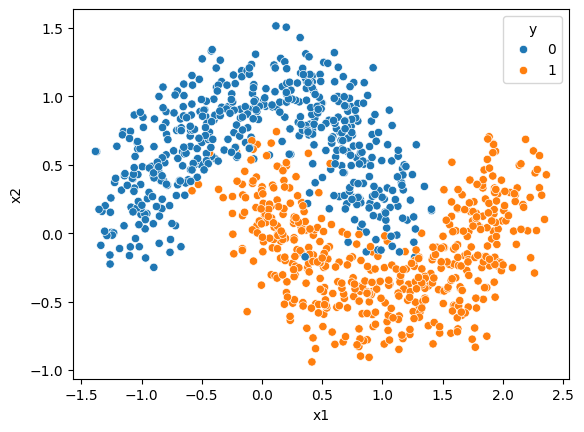

In [140]:
sns.scatterplot(x='x1',y='x2',data=dataset,hue='y')
plt.show()

In [142]:
x_a=dataset.iloc[:,:-1]
y_a=dataset['y']

In [144]:
from sklearn.model_selection import train_test_split

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [156]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [169]:
bg=BaggingClassifier(estimator=SVC(),n_estimators=50)
bg.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=50)

In [170]:
bg.score(x_train,y_train)*100,bg.score(x_test,y_test)*100

(96.625, 97.0)

In [174]:
# direct svc kaise deta he score
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(96.5, 97.0)

In [179]:
rf=RandomForestClassifier(n_estimators=30)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [181]:
rf.score(x_train,y_train)*100 , rf.score(x_test,y_test)*100

(100.0, 97.0)

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [189]:
dataset=pd.read_csv('placement.csv')

In [193]:
dataset.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


In [195]:
x=dataset.iloc[:,:-1]
y=dataset['package']

In [197]:
from sklearn.model_selection import train_test_split

In [199]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [209]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [213]:
bg=BaggingRegressor(estimator=LinearRegression(),n_estimators=40)
bg.fit(x_train,y_train)

BaggingRegressor(estimator=LinearRegression(), n_estimators=40)

In [215]:
bg.score(x_train,y_train)*100,bg.score(x_test,y_test)*100

(77.58311024383046, 77.29401652467119)

In [218]:
rf=RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [222]:
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

(91.50184503132101, 64.75907646275098)